# Etude sur les HAP (Hydrocarbure aromatique polycyclique) (DataForGood x Generations Futures S13)
date: 12/02/2025

author: Thomas Buffet

## Cadre de l'étude
Base de données "Eau distribuée par commune" 
https://www.data.gouv.fr/fr/datasets/resultats-du-controle-sanitaire-de-leau-distribuee-commune-par-commune/

## C'est quoi les HAP ?

**Hydrocarbure aromatique polycyclique**

Point de départ : on se base sur une liste de 12 composées :

- Anthracène 		
- Benzo[a]pyrène 	
- Chrysène 		
- Coronène 	
- Corannulène 		
- Tétracène 	
- Naphtalène 		
- Pentacène 	
- Phénanthrène 		
- Pyrène 	
- Triphénylène 		
- Ovalène

Source : https://fr.wikipedia.org/wiki/Hydrocarbure_aromatique_polycyclique


## Quelques ressources externes utiles
- 

## Les objectifs de cette étude : 
0) (Prérequis) Identifier une liste de HAPs présents dans la base de données.
1) Combien de prélévements de HAP ont été réalisés en 2024 ?
2) Combien étaient conformes/non conformes (dépassant la limite de qualité) en 2024 ?
3) Quelles ARS recherchent ces polluants en 2024 ? Combien d'ARS par région ?
4) Quelles catégories de situation existent en 2024 (NC0, NC1...) ? Sur quelles communes? 
5) Mêmes questions pour les années de 2020 à 2023, quelle est l'évolution ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import duckdb
from pipelines.tasks._common import DUCKDB_FILE

# Chargement de la base de données

pd.set_option("display.max_columns", None)  # show all cols
pd.set_option("display.max_colwidth", None)  # show full width of showing cols
pd.set_option(
    "display.expand_frame_repr", False
)  # print cols side by side as it's supposed to be

con = duckdb.connect(database=DUCKDB_FILE, read_only=True)

# Objectif 0

In [2]:
# La liste de 12 HAPs courants proposés par wikipedia

haps_wiki = ['Anthracène',
        'Benzo[a]pyrène',	
        'Chrysène', 		
        'Coronène',
        'Corannulène', 		
        'Tétracène', 	
        'Naphtalène', 		
        'Pentacène', 	
        'Phénanthrène', 		
        'Pyrène', 	
        'Triphénylène', 		
        'Ovalène']

In [3]:
# En recherchant d'autres orthographes possibles de ces composés, je mets à jour la liste avec les orthographes de la bdd

haps_wiki_noms_bdd = ['Anthracène',
        'Benzo(a)pyrène *',	# au lieu de Benzo[a]pyrène
        'Chrysène', 		
        'Naphtalène',
        'Phénantrène', 	# au lieu de Phénanthrène        
        'Pyrène']

# Restent ces HAPs qui n'apparaissent pas dans la BDD? même avec d'autres orthographes

haps_wiki_hors_bdd = ['Coronène',
                      'Corannulène', 
                      'Tétracène', 	
                      'Pentacène', 	
                      'Triphénylène', 
                      'Ovalène']

# J'ai également identifié ces composés dans la BDD qui sont des HAP (non exhaustif, basé sur une recherche des composés en -ène)
# Je valide leur nature de HAP en regardant leur page wikipedia

haps_bdd = ['Acénaphtène', # https://fr.wikipedia.org/wiki/Ac%C3%A9napht%C3%A8ne
            'Benzo(b)fluoranthène', #https://fr.wikipedia.org/wiki/Benzo(b)fluoranth%C3%A8ne
            'Benzanthracène', # https://fr.wikipedia.org/wiki/Benzanthrac%C3%A8ne
            'Benzo(g,h,i)pérylène', # https://fr.wikipedia.org/wiki/Benzo(ghi)p%C3%A9ryl%C3%A8ne
            'Dibenzo(a,h)anthracène', # https://en.wikipedia.org/wiki/Dibenz(a,h)anthracene
            'Fluoranthène *', # https://en.wikipedia.org/wiki/Fluoranthene
            'Indéno(1,2,3-cd)pyrène', # Indéno(1,2,3-cd)pyrène
]

# Pour les composés suivants, je ne suis pas sûr que ce soient des HAPs...
haps_bdd_possibles = ['Fluorène', # pas sûr que ce soit un cycle aromatique, car pas de double liaison dans le cycle central : https://en.wikipedia.org/wiki/Fluorene
                     ]

# Il y a aussi un champ qui regroupe plusieurs HAPs, mais je ne sais pas lesquels...
haps_somme = ['Hydrocarbures polycycliques aromatiques (4 substances)', ]

                      

In [4]:
# Pour la suite, je me concentre sur la liste de 14 HAPs suivante :

haps_etude = ['Anthracène',
        'Benzo(a)pyrène *',
        'Chrysène', 		
        'Naphtalène',
        'Phénantrène',      
        'Pyrène',
        'Acénaphtène', 
        'Benzo(b)fluoranthène', 
        'Benzanthracène', 
        'Benzo(g,h,i)pérylène', 
        'Dibenzo(a,h)anthracène',
        'Fluoranthène *', 
        'Indéno(1,2,3-cd)pyrène', 
]

## Résultats de l'objectif 0 : 
- Identification d'une liste de 13 HAPs dans la BDD :
'Anthracène',
'Benzo(a)pyrène *',
'Chrysène', 		
'Naphtalène',
'Phénantrène',      
'Pyrène',
'Acénaphtène', 
'Benzo(b)fluoranthène', 
'Benzanthracène', 
'Benzo(g,h,i)pérylène', 
'Dibenzo(a,h)anthracène',
'Fluoranthène *', 
'Indéno(1,2,3-cd)pyrène', 


#### Questions en suspens : 
- A faire valider par Pauline. Est-ce qu'on peut en trouver d'autres ?

# Objectif 1
Déterminer combien de prélévements de HAP ont été réalisés en 2024.

Sous objectifs
- 


In [5]:
where_clause = """
"dateprel" >= '2024-01-01'
"""

query = f"""
SELECT
  "edc_prelevements"."referenceprel",
  "edc_prelevements"."cdreseau",
  "edc_prelevements"."dateprel",
  "edc_prelevements"."nomcommuneprinc",
  "edc_resultats"."libminparametre",
  "edc_resultats"."valtraduite",
  "edc_resultats"."cdunitereferencesiseeaux",
  "edc_resultats"."limitequal",
  
  
FROM (
  SELECT
    *
  FROM "edc_prelevements" 
  WHERE
    {where_clause}
) AS edc_prelevements
INNER JOIN "edc_resultats"
  ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
  AND "edc_resultats"."libminparametre" IN ('Anthracène',
        'Benzo(a)pyrène *',
        'Chrysène', 		
        'Naphtalène',
        'Phénantrène',      
        'Pyrène',
        'Acénaphtène', 
        'Benzo(b)fluoranthène', 
        'Benzanthracène', 
        'Benzo(g,h,i)pérylène', 
        'Dibenzo(a,h)anthracène',
        'Fluoranthène *', 
        'Indéno(1,2,3-cd)pyrène')
"""


joined = con.sql(query)
joined_df = joined.df()
joined_df

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,referenceprel,cdreseau,dateprel,nomcommuneprinc,libminparametre,valtraduite,cdunitereferencesiseeaux,limitequal
0,00100143167,001000892,2024-11-25,SAINT-GERMAIN-DE-JOUX,Acénaphtène,0.0,µg/L,None
1,00100143167,001000892,2024-11-25,SAINT-GERMAIN-DE-JOUX,Anthracène,0.0,µg/L,None
2,00100143167,001000892,2024-11-25,SAINT-GERMAIN-DE-JOUX,Benzo(a)pyrène *,0.0,µg/L,<=0.01 µg/L
3,00100143167,001000892,2024-11-25,SAINT-GERMAIN-DE-JOUX,Benzo(b)fluoranthène,0.0,µg/L,<=0.1 µg/L
4,00100143167,001000892,2024-11-25,SAINT-GERMAIN-DE-JOUX,Benzanthracène,0.0,µg/L,None
...,...,...,...,...,...,...,...,...
129703,97200107970,972000079,2024-07-02,LORRAIN (LE),Naphtalène,0.0,µg/L,None
129704,97200107970,972000078,2024-07-02,LORRAIN (LE),Naphtalène,0.0,µg/L,None
129705,97200107970,972000036,2024-07-02,LORRAIN (LE),Naphtalène,0.0,µg/L,None
129706,97200107970,972000030,2024-07-02,LORRAIN (LE),Naphtalène,0.0,µg/L,None


In [6]:
# Pour quantifier le nombre de prélévements, j'identifie les combinaisons uniques des paramètres 'referenceprel', 'cdreseau' et'libminparametre'
joined_df = joined_df.drop_duplicates(subset=['referenceprel', 'cdreseau', 'libminparametre'])
print(f"Il y a eu {len(joined_df)} recherches de HAPs en 2024")

Il y a eu 129682 recherches de HAPs en 2024


In [7]:
print(f"Les HAP qui ont été recherchés sont {joined_df['libminparametre'].unique()}")

Les HAP qui ont été recherchés sont ['Acénaphtène' 'Anthracène' 'Benzo(a)pyrène *' 'Benzo(b)fluoranthène'
 'Benzanthracène' 'Benzo(g,h,i)pérylène' 'Chrysène'
 'Dibenzo(a,h)anthracène' 'Fluoranthène *' 'Indéno(1,2,3-cd)pyrène'
 'Naphtalène' 'Phénantrène' 'Pyrène']


Text(0.5, 1.0, 'Quantification des prélévements de 13 HAP en 2024 en France\nTotal = 129682 prélévements')

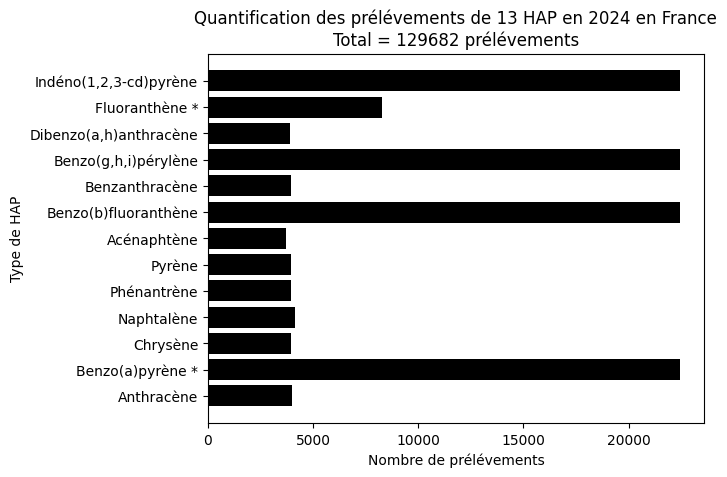

In [8]:
plt.barh(haps_etude, [len(joined_df[joined_df['libminparametre']==hap]) for hap in haps_etude], color='k')
plt.ylabel("Type de HAP")
plt.xlabel("Nombre de prélévements")
plt.title(f"Quantification des prélévements de {len(haps_etude)} HAP en 2024 en France\nTotal = {len(joined_df)} prélévements")


## Résultats de l'objectif 1 : 
- Il y a eu 129682  recherches de HAPs en 2024.
- Les 4 HAPs les plus recherchés sont : Indéno(1,2,3-cd)pyrène, Benzo(g,h,i)pérylène, Benzo(b)fluoranthène et Benzo(a)pyrène.
- Les 9 autres HAPs sont moins recherchés.


#### Questions en suspens : 
- 

# Objectif 2
Déterminer combien de prélévements de HAPs étaient conformes et non conformes en 2024.

Sous objectifs
- Identification d'un seuil pour chaque HAP
- Quantification des dépassements de seuil pour chaque HAP


In [9]:
# Identification d'un seuil pour chaque HAP

for hap in haps_etude:
    print(hap)
    print(joined_df[joined_df['libminparametre']==hap]['limitequal'].unique())


Anthracène
[None]
Benzo(a)pyrène *
['<=0.01 µg/L']
Chrysène
[None]
Naphtalène
[None]
Phénantrène
[None]
Pyrène
[None]
Acénaphtène
[None]
Benzo(b)fluoranthène
['<=0.1 µg/L']
Benzanthracène
[None]
Benzo(g,h,i)pérylène
['<=0.1 µg/L']
Dibenzo(a,h)anthracène
[None]
Fluoranthène *
[None]
Indéno(1,2,3-cd)pyrène
['<=0.1 µg/L']


In [10]:
# Quand aucune valeur de limite de qualité n'est indiqué, j'utilise 0.1µg/L
# La seuil valeur indiquée différente de 0.1µg/l est celle du Benzo(a)pyrène * (0.01µg/L).

# Je construit un dictionnaire contenant le seuil pour chaque composé

seuils = {}

for hap in haps_etude:
    if hap == 'Benzo(a)pyrène *':
        seuils[hap] = 0.01
    else:
        seuils[hap] = 0.1

print(seuils)

{'Anthracène': 0.1, 'Benzo(a)pyrène *': 0.01, 'Chrysène': 0.1, 'Naphtalène': 0.1, 'Phénantrène': 0.1, 'Pyrène': 0.1, 'Acénaphtène': 0.1, 'Benzo(b)fluoranthène': 0.1, 'Benzanthracène': 0.1, 'Benzo(g,h,i)pérylène': 0.1, 'Dibenzo(a,h)anthracène': 0.1, 'Fluoranthène *': 0.1, 'Indéno(1,2,3-cd)pyrène': 0.1}


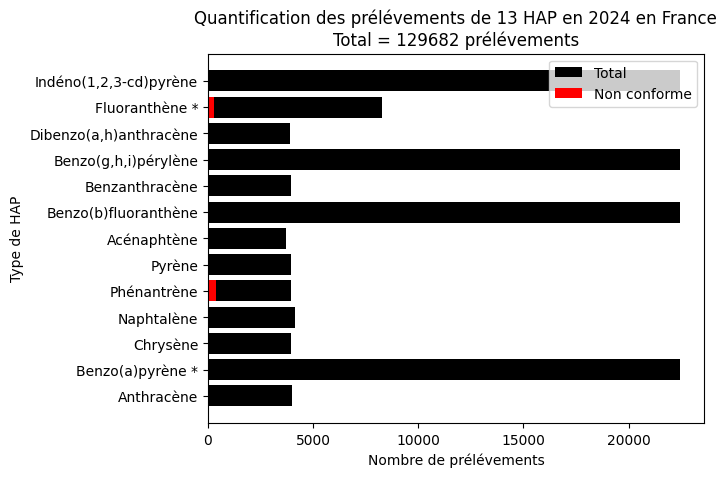

In [11]:
# Réprésentation des prélévement pour chaque composé en 2024

plt.barh(haps_etude, [len(joined_df[joined_df['libminparametre']==hap]) for hap in haps_etude], color='k', label="Total")
plt.barh(haps_etude, [len(joined_df[(joined_df['libminparametre']==hap) & (joined_df['valtraduite']>=seuils[hap])]) for hap in haps_etude], color='r', label="Non conforme")

plt.ylabel("Type de HAP")
plt.xlabel("Nombre de prélévements")
plt.title(f"Quantification des prélévements de {len(haps_etude)} HAP en 2024 en France\nTotal = {len(joined_df)} prélévements")
plt.legend()


# Objectif 3
Déterminer quelles ARS réalisent ces prélévements.

Sous objectifs
- 


In [12]:
joined_df['nomcommuneprinc'].unique()

array(['SAINT-GERMAIN-DE-JOUX', 'FARGES', 'GEX', ..., 'PETITE-ILE',
       'ENTRE-DEUX', 'TROIS-BASSINS (LES)'], shape=(12424,), dtype=object)

In [13]:
print(f"{joined_df['nomcommuneprinc'].unique().shape[0]} communes ont réalisés des prélévements de HAPs en 2024")

12424 communes ont réalisés des prélévements de HAPs en 2024


## Résultats Objectif 3

- 12424 communes ont réalisés des prélévements de HAPs en 2024

### Questions restant en suspens
- Qu'est-ce qui est attendu exactement ici ? Regrouper les communes par régions pour identifier les ARS ?

# Objectif 4
Déterminer quelles catégories de situation existent en 2024 (NC0, NC1...). Sur quelles communes? 

Pour rappel :
- Si C < limitequal, situation C
- Si C > limitequal pendant moins de 30 jours cumulés sur 12 mois, situation NC0
- Si C > limitequal pendant plus de 30 jours cumulés sur 12 mois, situation NC1
- Si C > Vmax, situation NC2 (non applicable ici car pas de Vmax définie)
Voir https://outline.services.dataforgood.fr/doc/espace-de-travail-data-analysts-Q3VWrKUd2g


Sous objectifs
- 


In [14]:
### Work in progress

# hap = 'Fluoranthène *'

# communes = joined_df[(joined_df['libminparametre']==hap) & (joined_df['valtraduite']>=seuils[hap])]['nomcommuneprinc'].unique()

# for commune in communes:
#     print(commune, len(joined_df[(joined_df['libminparametre']==hap) & (joined_df['valtraduite']>=seuils[hap]) & (joined_df['nomcommuneprinc']==commune)]), joined_df[(joined_df['libminparametre']==hap) & (joined_df['valtraduite']>=seuils[hap]) & (joined_df['nomcommuneprinc']==commune)]['dateprel'])

# def determine_situation(joined_df, compound, commune):

#     depassements = joined_df[(joined_df['libminparametre']==hap) & (joined_df['valtraduite']>=seuils[hap]) & (joined_df['nomcommuneprinc']==commune)]

#     if len(depassements) == 0:
#         return 'C'

#     elif len(depassements) > 0:

#         if len(depassements) ==1 : 
#             return NC0

#         else:
#             pass 
    

## Résultats Objectif 4

**TODO**

### Questions restées en suspens
- Quelle définition prend-on exactement pour NC0 et NC1 ? Est-ce que s'il y a un seul prélévement non conforme, et aucun prélévement qui indique un retour en conformité, on garde l'alerte la plus haute NC1 ? Ou bien il faut un deuxième prélévement pour prouver que la commune est restée en non conformité ?
- Comment faire si on n'a pas de Vmax ? En rechercher une dans des rapports de l'ANSES, ou autres publications ?

# Objectif 5
Etendre l'analyse aux autres années et analyser l'évolution.

Sous objectifs
1) Combien de prélévements de HAPs ont été réalisés ?
2) Combien étaient conformes/non conformes (dépassant la limite de qualité) ?
3) Quelles ARS recherchent ces polluants ? Combien d'ARS par région ?
4) Quelles catégories de situation existent (NC0, NC1...) ? Sur quelles communes? 


## Objectif 5.1 : combien de prélévements ont été réaliss chaque année ?

In [15]:
years = ["2020","2021","2022","2023","2024"]

In [16]:
haps_analysis = {}

for year in years:

    print(f"Loading HAP analyses from year {year}...")
    
    where_clause = f"""
    "dateprel" >= '{year}-01-01'
    AND
    "dateprel" <= '{year}-12-31'
    """

    query = f"""
    SELECT
      "edc_prelevements"."referenceprel",
      "edc_prelevements"."cdreseau",
      "edc_prelevements"."dateprel",
      "edc_prelevements"."nomcommuneprinc",
      "edc_resultats"."libminparametre",
      "edc_resultats"."valtraduite",
      "edc_resultats"."cdunitereferencesiseeaux",
      "edc_resultats"."limitequal",
      
      
    FROM (
      SELECT
        *
      FROM "edc_prelevements" 
      WHERE
        {where_clause}
    ) AS edc_prelevements
    INNER JOIN "edc_resultats"
      ON "edc_prelevements"."referenceprel" = "edc_resultats"."referenceprel"
      AND "edc_resultats"."libminparametre" IN ('Anthracène',
        'Benzo(a)pyrène *',
        'Chrysène', 		
        'Naphtalène',
        'Phénantrène',      
        'Pyrène',
        'Acénaphtène', 
        'Benzo(b)fluoranthène', 
        'Benzanthracène', 
        'Benzo(g,h,i)pérylène', 
        'Dibenzo(a,h)anthracène',
        'Fluoranthène *', 
        'Indéno(1,2,3-cd)pyrène')
    """
    
    
    joined_df = con.sql(query).df()
    joined_df = joined_df.drop_duplicates(subset=['referenceprel', 'cdreseau', 'libminparametre'])

    haps_analysis[year] = joined_df

    print("Done.")

Loading HAP analyses from year 2020...
Done.
Loading HAP analyses from year 2021...
Done.
Loading HAP analyses from year 2022...
Done.
Loading HAP analyses from year 2023...
Done.
Loading HAP analyses from year 2024...
Done.


Text(0.5, 1.0, 'Quantification des prélévements totaux de 13 HAP entre 2020 et 2024 en France')

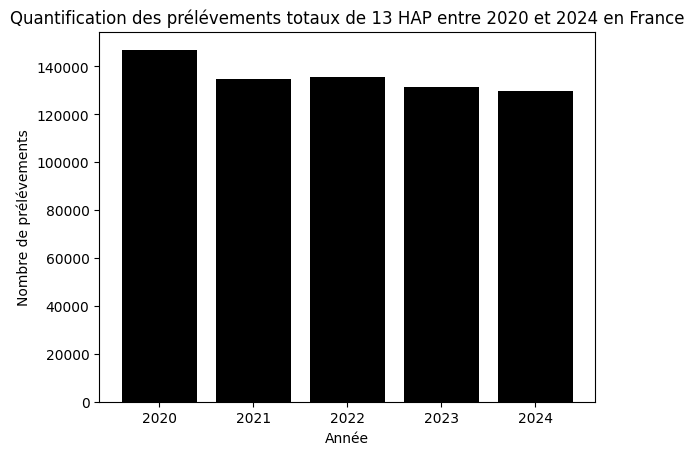

In [17]:
plt.bar(years, [len(haps_analysis[year]) for year in years], color='k')
plt.ylabel("Nombre de prélévements")
plt.xlabel("Année")
plt.title(f"Quantification des prélévements totaux de {len(haps_etude)} HAP entre 2020 et 2024 en France")


## Objectif 5.2 : combien de prélévements étaient conformes et non conformes ?

In [18]:
n_non_conformes = {}

for year in years:
    print(year)
    n_non_conformes[year]  = [len(haps_analysis[year][(haps_analysis[year]['libminparametre']==hap) & (haps_analysis[year]['valtraduite']>=seuils[hap])]) for hap in haps_etude]
    for i, hap in enumerate(haps_etude):
        print(hap, n_non_conformes[year][i])



2020
Anthracène 1
Benzo(a)pyrène * 13
Chrysène 0
Naphtalène 44
Phénantrène 623
Pyrène 20
Acénaphtène 2
Benzo(b)fluoranthène 1
Benzanthracène 0
Benzo(g,h,i)pérylène 2
Dibenzo(a,h)anthracène 0
Fluoranthène * 444
Indéno(1,2,3-cd)pyrène 0
2021
Anthracène 3
Benzo(a)pyrène * 37
Chrysène 1
Naphtalène 47
Phénantrène 539
Pyrène 12
Acénaphtène 18
Benzo(b)fluoranthène 4
Benzanthracène 1
Benzo(g,h,i)pérylène 2
Dibenzo(a,h)anthracène 0
Fluoranthène * 404
Indéno(1,2,3-cd)pyrène 3
2022
Anthracène 7
Benzo(a)pyrène * 9
Chrysène 0
Naphtalène 49
Phénantrène 582
Pyrène 23
Acénaphtène 6
Benzo(b)fluoranthène 2
Benzanthracène 0
Benzo(g,h,i)pérylène 0
Dibenzo(a,h)anthracène 0
Fluoranthène * 449
Indéno(1,2,3-cd)pyrène 0
2023
Anthracène 6
Benzo(a)pyrène * 6
Chrysène 0
Naphtalène 33
Phénantrène 447
Pyrène 9
Acénaphtène 7
Benzo(b)fluoranthène 1
Benzanthracène 0
Benzo(g,h,i)pérylène 0
Dibenzo(a,h)anthracène 0
Fluoranthène * 333
Indéno(1,2,3-cd)pyrène 1
2024
Anthracène 4
Benzo(a)pyrène * 16
Chrysène 3
Naphtalène 23

In [19]:
n_non_conformes

{'2020': [1, 13, 0, 44, 623, 20, 2, 1, 0, 2, 0, 444, 0],
 '2021': [3, 37, 1, 47, 539, 12, 18, 4, 1, 2, 0, 404, 3],
 '2022': [7, 9, 0, 49, 582, 23, 6, 2, 0, 0, 0, 449, 0],
 '2023': [6, 6, 0, 33, 447, 9, 7, 1, 0, 0, 0, 333, 1],
 '2024': [4, 16, 3, 23, 374, 10, 5, 4, 3, 0, 0, 279, 1]}

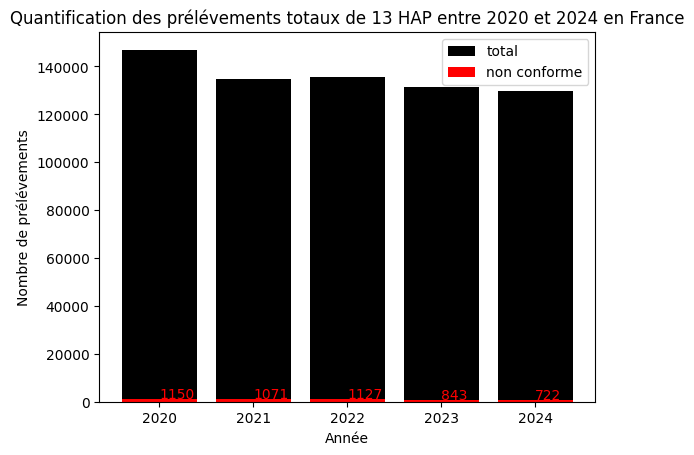

In [20]:
plt.bar(years, [len(haps_analysis[year]) for year in years], color='k', label="total")
plt.bar(years, [sum(n_non_conformes[year]) for year in years], color='r', label="non conforme")

for year in years:
    plt.annotate(sum(n_non_conformes[year]), (year, sum(n_non_conformes[year])+200), color='r')

plt.ylabel("Nombre de prélévements")
plt.xlabel("Année")
plt.title(f"Quantification des prélévements totaux de {len(haps_etude)} HAP entre 2020 et 2024 en France")
plt.legend()

(0.0, 1171.4)

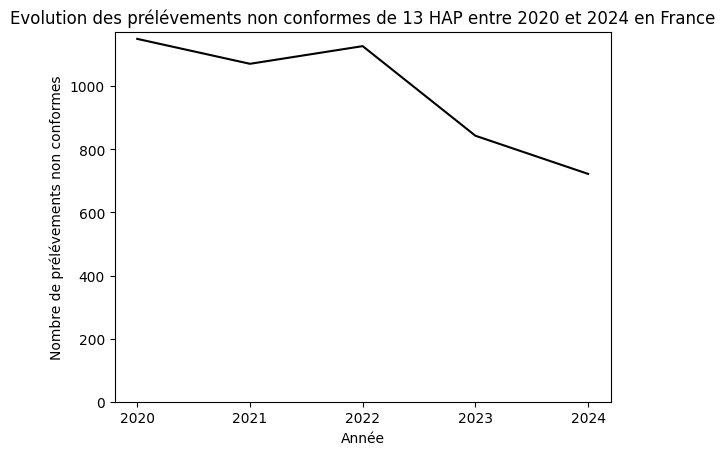

In [21]:
plt.plot(years, [sum(n_non_conformes[year]) for year in years], color='k')

plt.ylabel("Nombre de prélévements non conformes")
plt.xlabel("Année")
plt.title(f"Evolution des prélévements non conformes de {len(haps_etude)} HAP entre 2020 et 2024 en France")
plt.ylim(bottom = 0)

(0.0, 0.8451486875986642)

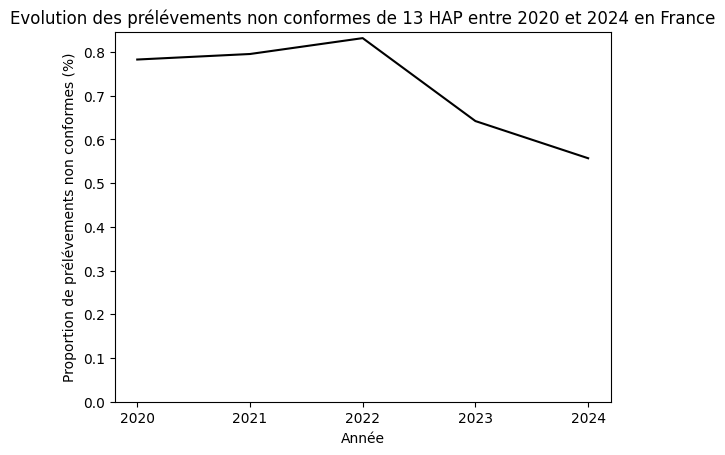

In [22]:
plt.plot(years, [(sum(n_non_conformes[year])/len(haps_analysis[year]))*100 for year in years], color='k')

plt.ylabel("Proportion de prélévements non conformes (%)")
plt.xlabel("Année")
plt.title(f"Evolution des prélévements non conformes de {len(haps_etude)} HAP entre 2020 et 2024 en France")
plt.ylim(bottom=0)

## Résultats Objectif 5.2

### On observe une diminution de la quantité de prélévements non conformes, qui n'est pas explicable par la baisse du nombre de prélévements (la proportion diminue aussi).

## Questions restées en suspens :
- Est-il nécessaire de décliner l'analyse pour chaque HAP individuellement ?

## Objectif 5.3 : Quelles ARS réalisent ces prélévements ? Quelle évolution ?

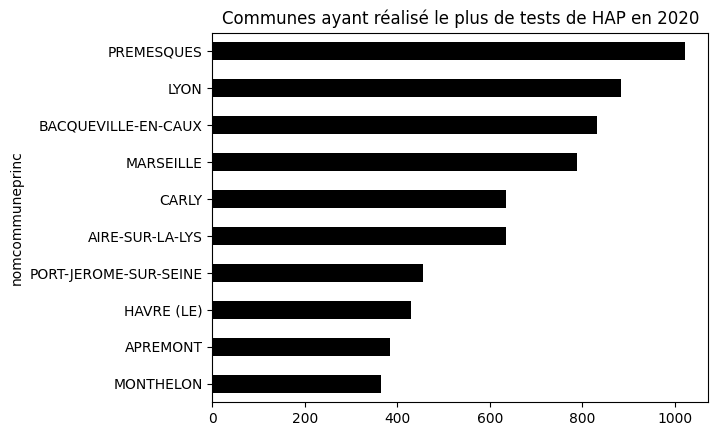

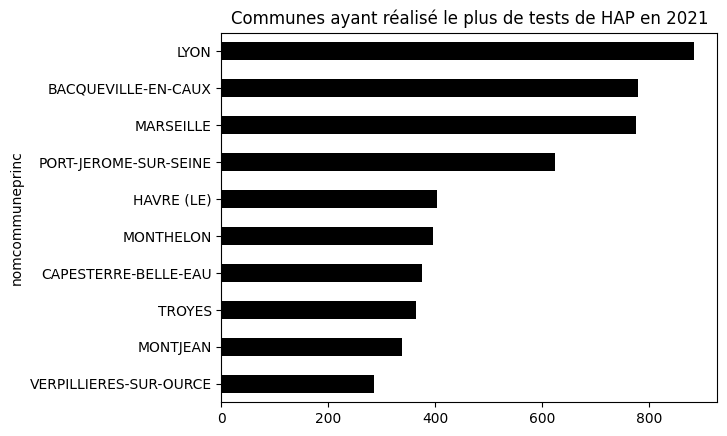

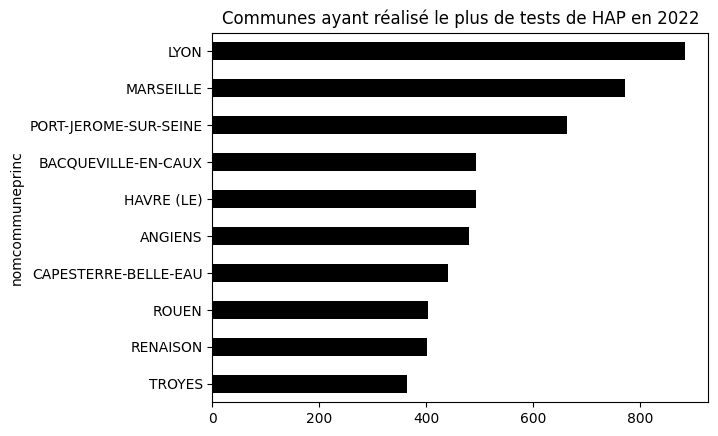

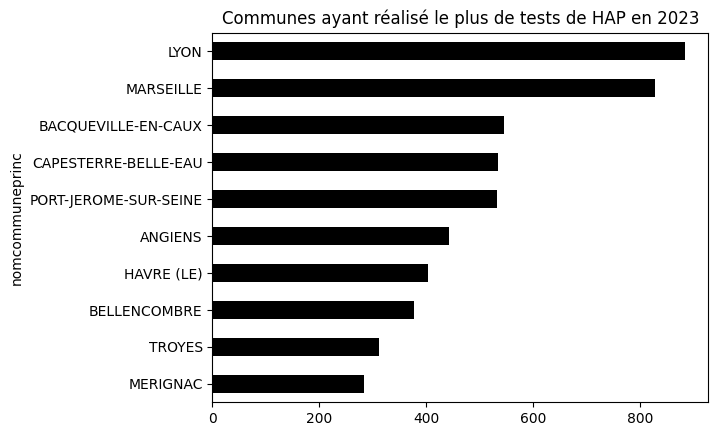

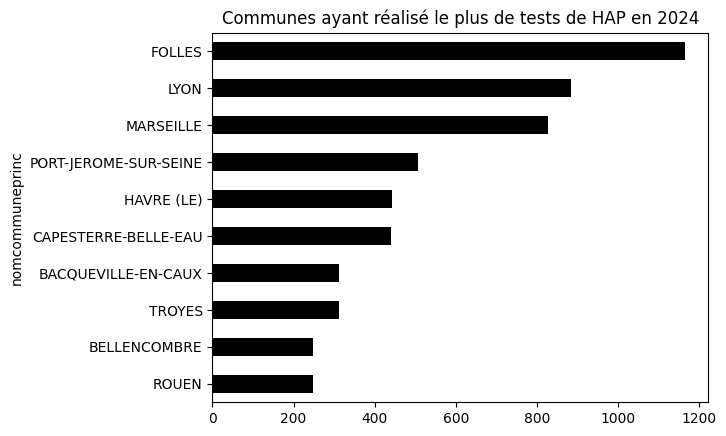

In [33]:
for year in years:
    plt.figure()
    haps_analysis[year]['nomcommuneprinc'].value_counts()[:10].plot(kind='barh', color='k')
    plt.gca().invert_yaxis()
    plt.title(f"Communes ayant réalisé le plus de tests de HAP en {year}")

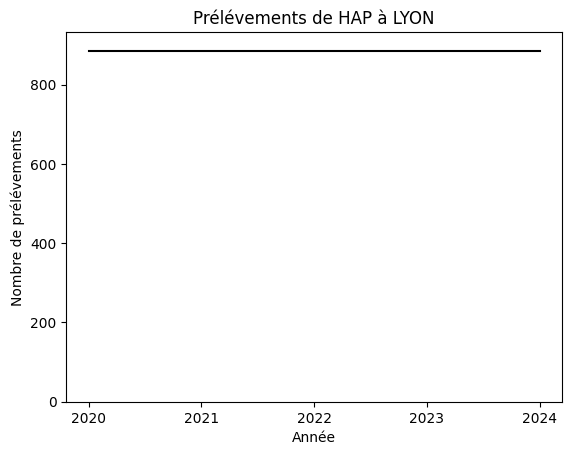

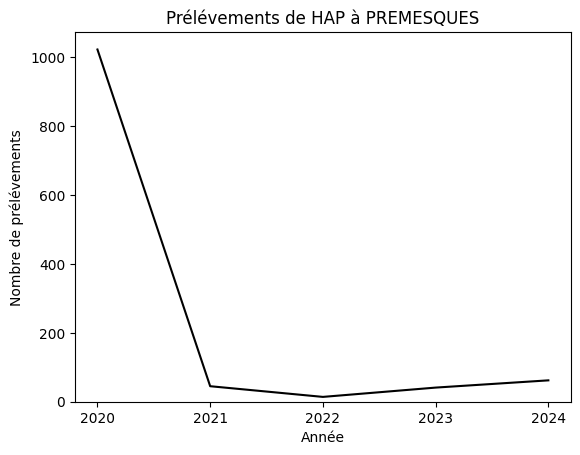

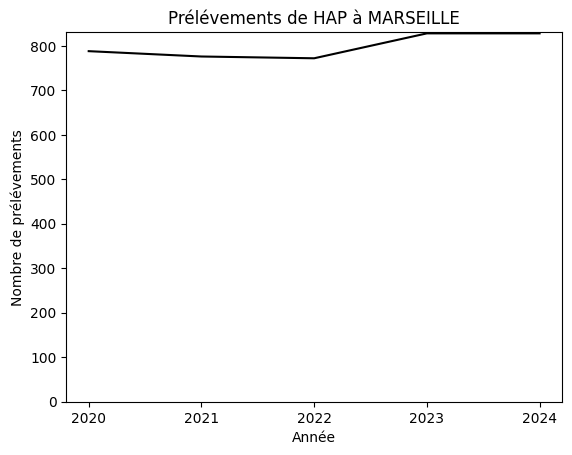

In [45]:
for commune in ['LYON', 'PREMESQUES', 'MARSEILLE']:
    plt.figure()
    plt.plot(years, [len(haps_analysis[year][haps_analysis[year]['nomcommuneprinc']== commune]) for year in years], c='k')
    plt.title(f"Prélévements de HAP à {commune}")
    plt.ylabel("Nombre de prélévements")
    plt.xlabel("Année")
    plt.ylim(bottom=0)

## Résultats Objectif 5.4

- La quantité de prélévements de HAP est très variable entre communes (entre 0 et 1000)
- Certaines communes sont (étrangement ?) stables (e.g. Lyon), d'autres ont diminué leurs tests (e.g. Premesques)

## Questions restées en suspens :
- Même question que précédemment, qu'est-ce qu'on recherche exactement ici ? Est-ce qu'on veut représenter les communes où ça teste sur une carte ?

## Objectif 5.4

Quelles catégories de situation existent (NC0, NC1...) ? Sur quelles communes? 

Ici même problème que précédemment, besoin d'une meilleure définition des situations de non conformité avant d'implémenter un classifieur.

**TODO**